<a href="https://colab.research.google.com/github/JahaanThakkar/Computational-Physics-Assignments/blob/main/Assgn2_Jahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt
from math import *

# Problem 1

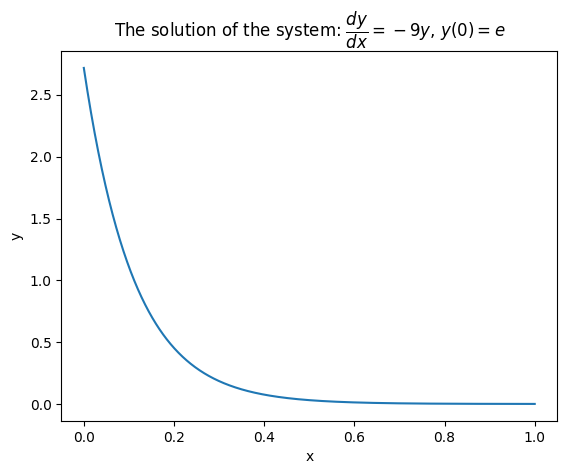

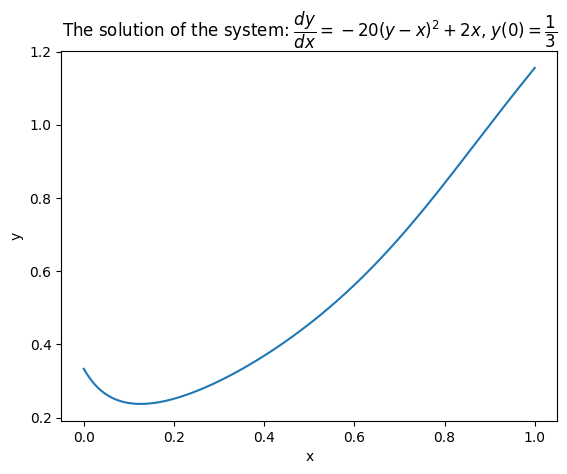

In [ ]:
x0 = 0
xm = 1
N = 1000
h = (xm-x0)/N
X = np.linspace(x0,xm,N+1)

y0 = e
Y = np.zeros(X.size)
Y[0] = y0
for i in range(N):
  y = Y[i]
  y1 = y/(1 + (9*h))
  Y[i+1] = y1

plt.figure(0)
plt.title(r'The solution of the system: $\dfrac{dy}{dx} = -9y$, $y(0) = e$')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X,Y)
plt.show()

y01 = 1/3
Y1 = np.zeros(X.size)
Y1[0] = y01
for i in range(N):
  x = X[i]
  y = Y1[i]
  y1 = (1/40)*(-(1/h) + (40*x) + sqrt(1 - (80*h*x) + (160*(h**2)*x) + (80*h*y))/h)
  Y1[i+1] = y1

plt.figure(1)
plt.title(r'The solution of the system: $\dfrac{dy}{dx} = -20(y-x)^2 + 2x$, $y(0) = \dfrac{1}{3}$')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X,Y1)
plt.show()

# Problem 2


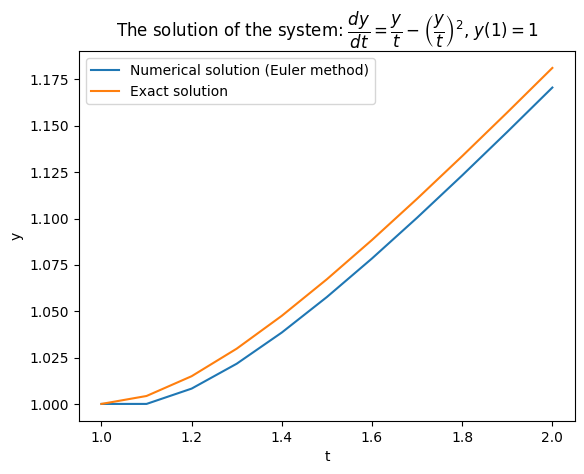

In [ ]:
# Define the parameters
dt = 0.1  # Time step
t_initial = 1.0
t_final = 2.0  # Final time
N = int((t_final - t_initial) / dt)  # Number of time steps
y0 = 1.0  # Initial condition

T = np.linspace(t_initial,t_final,N+1)
Y = np.zeros(N+1)
Yt = np.zeros(N+1)
Y[0] = y0
Yt[0] = y0

# Euler method loop
for i in range(N):
    y = Y[i]
    t = T[i]
    dy_dt = (y/t) - (y/t)**2  # Define the derivative
    Y[i+1] = y + (dy_dt*dt)  # Euler integration step
    Yt[i+1] = T[i+1]/(1 + log(T[i+1]))

plt.figure(0)
plt.title(r'The solution of the system: $\dfrac{dy}{dt} = \dfrac{y}{t} - \left(\dfrac{y}{t}\right)^2$, $y(1) = 1$')
plt.xlabel('t')
plt.ylabel('y')
plt.plot(T,Y,label='Numerical solution (Euler method)')
plt.plot(T,Yt,label='Exact solution')
plt.legend()
plt.show()

# Problem 3

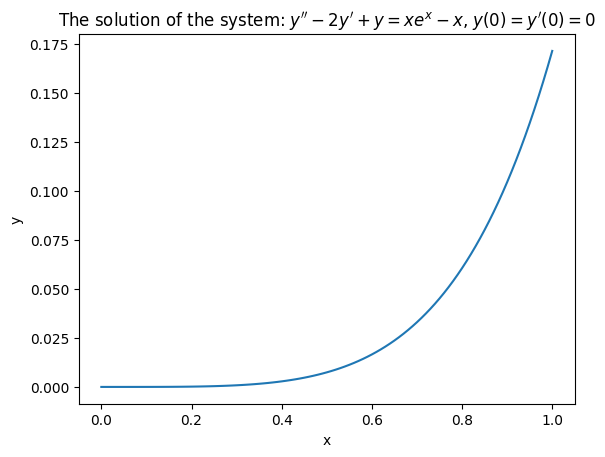

In [ ]:
def f(x, y):
    return np.array([y[1], x*(e**x) - x - y[0] + (2*y[1])])

def RK4_second_order_eqn(dx, x_initial, x_final, y_initial, v_initial):
    N = int((x_final - x_initial)/dx)
    X = np.linspace(x_initial, x_final, N+1)
    Y = np.zeros([N+1,2])

    Y[0,0] = y_initial
    Y[0,1] = v_initial

    for i in range(N):
        k1 = np.multiply(dx,f(X[i],Y[i]))

        k2 = np.multiply(dx,f(X[i] + 0.5*dx,Y[i] + 0.5*k1))

        k3 = np.multiply(dx,f(X[i] + 0.5*dx,Y[i] + 0.5*k2))

        k4 = np.multiply(dx,f(X[i] + dx,Y[i] + k3))

        Y[i+1] = Y[i] + (k1 + 2*k2 + 2*k3 + k4)/6

    return X, Y

X,Y = RK4_second_order_eqn(0.01, 0.0, 1.0, 0.0, 0.0)

plt.figure(0)
plt.title(r"The solution of the system: $y'' - 2y' + y = xe^x - x$, $y(0) = y'(0) = 0$")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X,Y[:,0])
plt.show()

# Problem 6

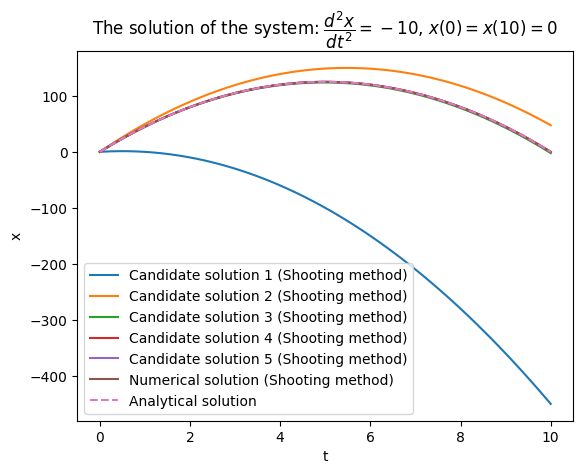

In [ ]:
from scipy.integrate import solve_ivp

def f(t, x):
    return np.array([x[1],-10])

N = 100
T = np.linspace(0,10,N+1)
amax = 1000
amin = 5
an = 10
astep = (amax - amin)/an
sols = []
itr = 6
plt.figure(0)
plt.title(r'The solution of the system: $\dfrac{d^2x}{dt^2} = -10$, $x(0) = x(10) = 0$')
plt.xlabel('t')
plt.ylabel('x')
for i in range(itr):
  ck = np.array([0])
  a = amin
  while a <= amax:
    sol = solve_ivp(f, [0, 10], [0,a], t_eval=[10])
    ck = np.append(ck,abs(sol.y[0][0]))
    a += astep
  ck = ck[1:]
  at = amin + (astep*np.argmin(ck))
  s = solve_ivp(f, [0, 10], [0,at], t_eval=T)
  if i < 5:
    plt.plot(T,s.y[0],label="Candidate solution %d (Shooting method)"%(i+1))
  else:
    plt.plot(T,s.y[0],label="Numerical solution (Shooting method)")
  amin = at - (astep/2)
  amax = at + (astep/2)
  astep = (amax - amin)/an


plt.plot(T,-5*(-10 + T)*T,'--',label="Analytical solution")
plt.legend()
plt.show()

# Problem 7

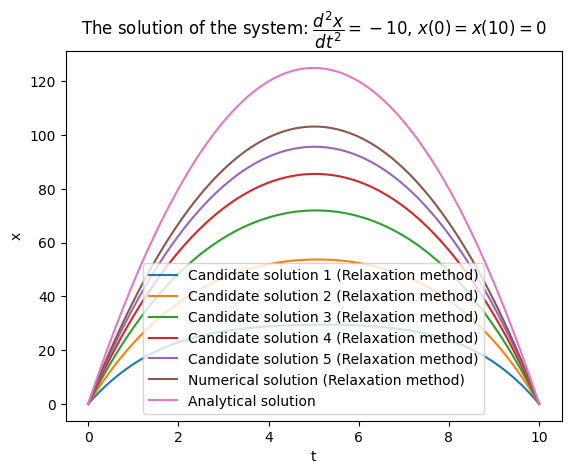

In [ ]:
N = 100
h = 10/N
T = np.linspace(0,10,N+1)
itr = 2000
X = np.zeros(T.size)
plt.figure(0)
plt.title(r'The solution of the system: $\dfrac{d^2x}{dt^2} = -10$, $x(0) = x(10) = 0$')
plt.xlabel('t')
plt.ylabel('x')
for i in range(itr):
  for j in range(1,len(X)-1):
    X[j] = (X[j-1]+X[j+1]+10*(h**2))/2
  if i%300==0 and 0<i<1700:
    c = i/300
    plt.plot(T,X,label="Candidate solution %d (Relaxation method)"%c)
  if i==1800:
    plt.plot(T,X,label="Numerical solution (Relaxation method)")

plt.plot(T,-5*(-10 + T)*T,label="Analytical solution")
plt.legend()
plt.show()

# Problem 8

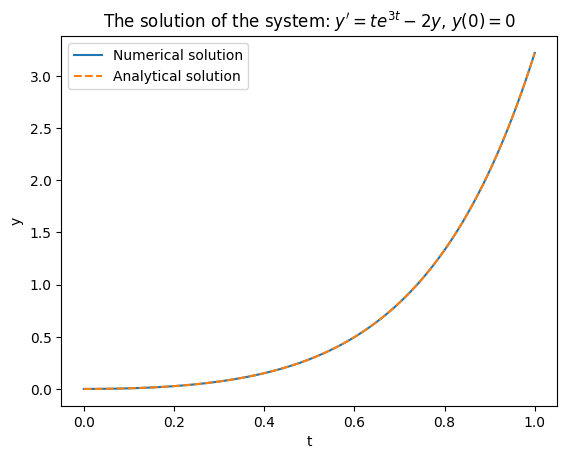

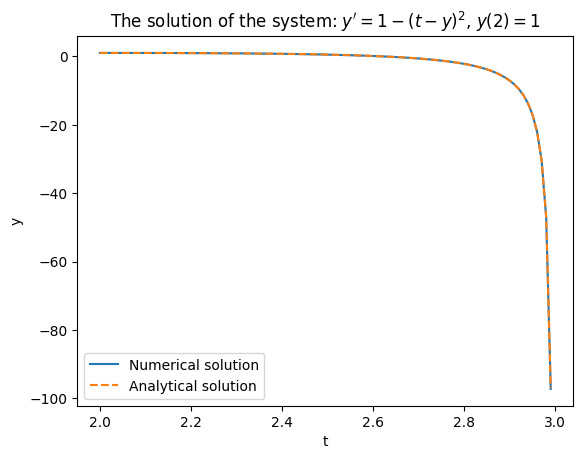

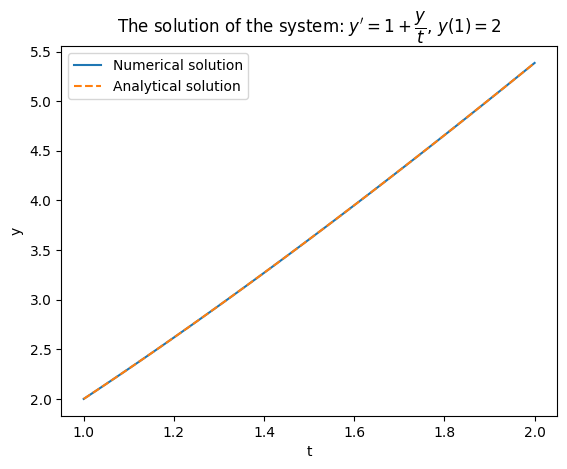

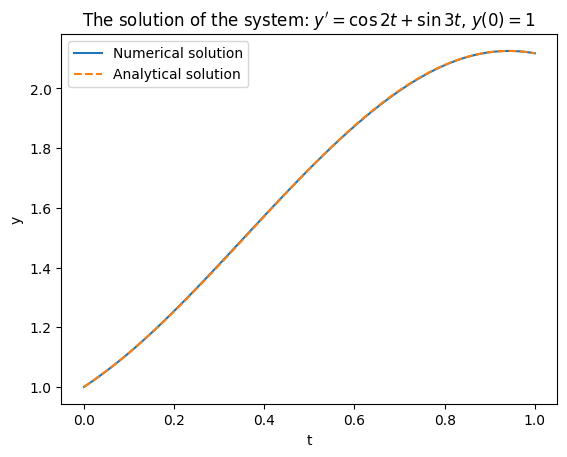

In [ ]:
from scipy.integrate import solve_ivp

def f1(t, y):
    dydt = t*(e**(3*t)) - (2*y)
    return dydt

def f2(t, y):
    dydt = 1 - (t-y)**2
    return dydt

def f3(t, y):
    dydt = 1 + (y/t)
    return dydt

def f4(t, y):
    dydt = cos(2*t) + sin(3*t)
    return dydt

N = 100
sol1 = solve_ivp(f1, [0, 1], [0], t_eval=np.linspace(0,1,N+1))
sol2 = solve_ivp(f2, [2, 3], [1], t_eval=np.linspace(2,3,N+1))
sol3 = solve_ivp(f3, [1, 2], [2], t_eval=np.linspace(1,2,N+1))
sol4 = solve_ivp(f4, [0, 1], [1], t_eval=np.linspace(0,1,N+1))

plt.figure(0)
plt.title(r"The solution of the system: $y' = te^{3t} - 2y$, $y(0) = 0$")
plt.xlabel('t')
plt.ylabel('y')
plt.plot(sol1.t,sol1.y[0],label='Numerical solution')
plt.plot(sol1.t,(1/25)*e**(-2*sol1.t)*(1 + e**(5*sol1.t)*(-1 + (5*sol1.t))),'--',label='Analytical solution')
plt.legend()
plt.show()

plt.figure(1)
plt.title(r"The solution of the system: $y' = 1 - (t - y)^2$, $y(2) = 1$")
plt.xlabel('t')
plt.ylabel('y')
plt.plot(sol2.t,sol2.y[0],label='Numerical solution')
plt.plot(sol2.t,(1-(3*sol2.t)+(sol2.t**2))/(-3+sol2.t),'--',label='Analytical solution')
plt.legend()
plt.show()

plt.figure(2)
plt.title(r"The solution of the system: $y' = 1 + \dfrac{y}{t}$, $y(1) = 2$")
plt.xlabel('t')
plt.ylabel('y')
plt.plot(sol3.t,sol3.y[0],label='Numerical solution')
plt.plot(sol3.t,sol3.t*(2 + np.log(sol3.t)),'--',label='Analytical solution')
plt.legend()
plt.show()

plt.figure(3)
plt.title(r"The solution of the system: $y' = \cos{2t} + \sin{3t}$, $y(0) = 1$")
plt.xlabel('t')
plt.ylabel('y')
plt.plot(sol4.t,sol4.y[0],label='Numerical solution')
plt.plot(sol4.t,(1/6)*(8-(2*np.cos(3*sol4.t))+(3*np.sin(2*sol4.t))),'--',label='Analytical solution')
plt.legend()
plt.show()

# Problem 9

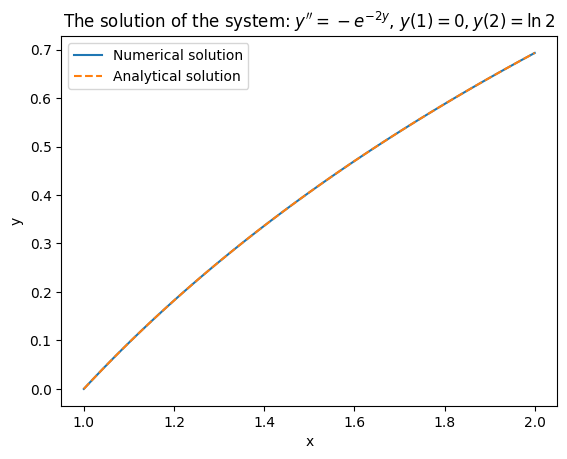

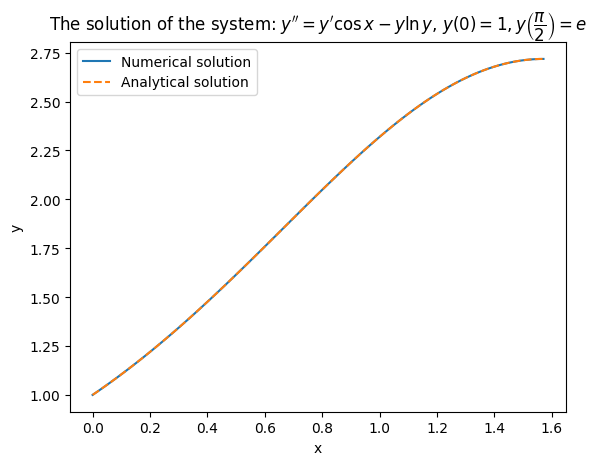

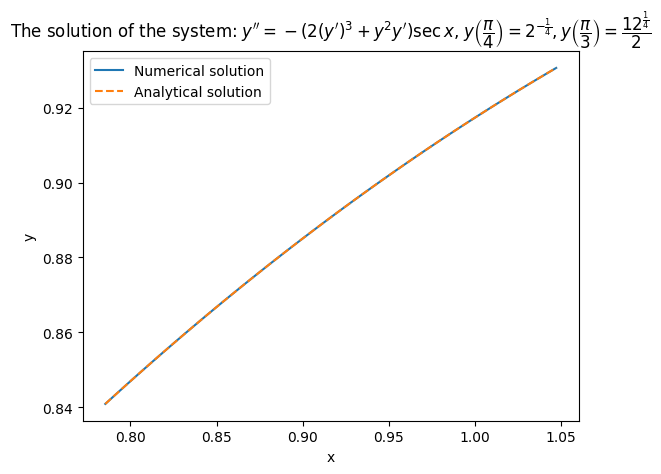

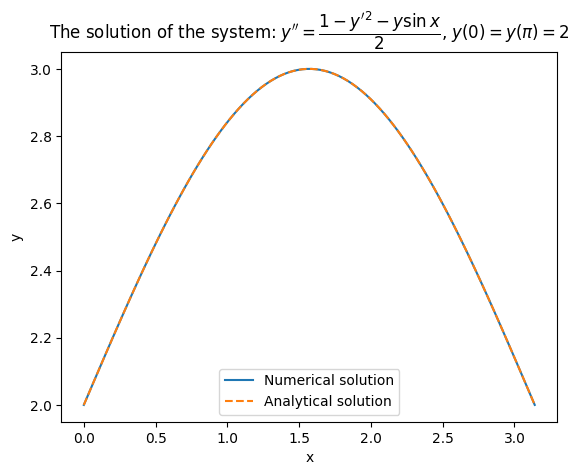

In [ ]:
from scipy.integrate import solve_bvp

def ode1(x, y):
    return np.vstack((y[1], -e**(-2*y[0])))

def bc1(ya, yb):
    return np.array([ya[0] - 0, yb[0] - log(2)])

a1 = 1
b1 = 2

x_guess1 = np.linspace(a1, b1, 100)
y_guess1 = np.zeros((2, x_guess1.size))

sol1 = solve_bvp(ode1, bc1, x_guess1, y_guess1)

y_plot1 = sol1.sol(x_guess1)[0]

def ode2(x, y):
    return np.vstack((y[1], (y[1]*np.cos(x))-(y[0]*np.log(y[0]))))

def bc2(ya, yb):
    return np.array([ya[0] - 1, yb[0] - e])

a2 = 0
b2 = pi/2

x_guess2 = np.linspace(a2, b2, 100)
y_guess2 = np.ones((2, x_guess2.size))

sol2 = solve_bvp(ode2, bc2, x_guess2, y_guess2)

y_plot2 = sol2.sol(x_guess2)[0]

def ode3(x, y):
    return np.vstack((y[1], -(2*(y[1])**3 + (y[0]**2)*y[1])*(1/np.cos(x))))

def bc3(ya, yb):
    return np.array([ya[0] - 2**(-1/4), yb[0] - (12**(1/4))/2])

a3 = pi/4
b3 = pi/3

x_guess3 = np.linspace(a3, b3, 100)
y_guess3 = np.zeros((2, x_guess3.size))

sol3 = solve_bvp(ode3, bc3, x_guess3, y_guess3)

y_plot3 = sol3.sol(x_guess3)[0]

def ode4(x, y):
    return np.vstack((y[1], (1 - y[1]**2 - (y[0]*np.sin(x)))/2))

def bc4(ya, yb):
    return np.array([ya[0] - 2, yb[0] - 2])

a4 = 0
b4 = pi

x_guess4 = np.linspace(a4, b4, 100)
y_guess4 = np.zeros((2, x_guess4.size))

sol4 = solve_bvp(ode4, bc4, x_guess4, y_guess4)

y_plot4 = sol4.sol(x_guess4)[0]

plt.figure(0)
plt.title(r"The solution of the system: $y'' = -e^{-2y}$, $y(1) = 0, y(2) = \ln{2}$")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_guess1, y_plot1, label='Numerical solution')
plt.plot(x_guess1, np.log(x_guess1), '--', label='Analytical solution')
plt.legend()
plt.show()

plt.figure(1)
plt.title(r"The solution of the system: $y'' = y'\cos{x} - y\ln{y}$, $y(0) = 1, y\left(\dfrac{\pi}{2}\right) = e$")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_guess2, y_plot2, label='Numerical solution')
plt.plot(x_guess2, np.exp(np.sin(x_guess2)), '--', label='Analytical solution')
plt.legend()
plt.show()

plt.figure(2)
plt.title(r"The solution of the system: $y'' = -(2(y')^3 + y^2 y')\sec{x}$, $y\left(\dfrac{\pi}{4}\right) = 2^{-\frac{1}{4}}, y\left(\dfrac{\pi}{3}\right) = \dfrac{12^{\frac{1}{4}}}{2}$")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_guess3, y_plot3, label='Numerical solution')
plt.plot(x_guess3, np.sqrt(np.sin(x_guess3)), '--', label='Analytical solution')
plt.legend()
plt.show()

plt.figure(3)
plt.title(r"The solution of the system: $y'' = \dfrac{1 - y'^2 - y\sin{x}}{2}$, $y(0) = y(\pi) = 2$")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_guess4, y_plot4, label='Numerical solution')
plt.plot(x_guess4, 2 + np.sin(x_guess4), '--', label='Analytical solution')
plt.legend()
plt.show()

# Problem 10

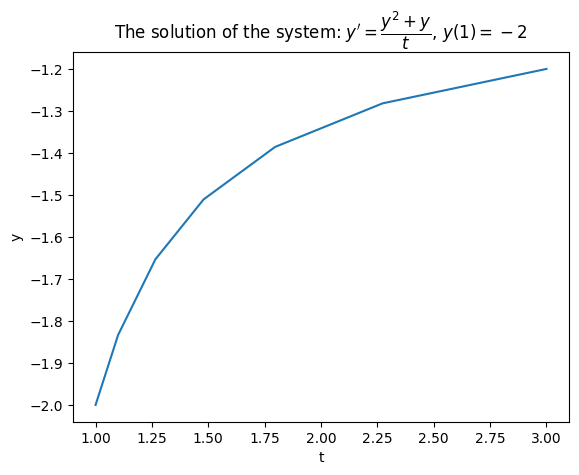

In [ ]:
def f(t, y):
    return (y**2 + y)/t

def RK4_first_order_eqn(f, t, y, dt):
  k1 = np.multiply(dt,f(t,y))
  k2 = np.multiply(dt,f(t + 0.5*dt,y + 0.5*k1))
  k3 = np.multiply(dt,f(t + 0.5*dt,y + 0.5*k2))
  k4 = np.multiply(dt,f(t + dt,y + k3))

  y1 = y + (k1 + 2*k2 + 2*k3 + k4)/6

  return y1

dt = 0.1
t_initial = 1
t_final = 3
y_initial = -2
tol = 10**(-4)
T = [t_initial]
Y = [y_initial]
while T[-1] + dt < t_final:
    s1 = RK4_first_order_eqn(f, T[-1], Y[-1], dt)
    Y.append(s1)
    T.append(T[-1] + dt)
    s2 = RK4_first_order_eqn(f, T[-1], Y[-1], dt)
    u1 = RK4_first_order_eqn(f, T[-2], Y[-2], 2*dt)
    if np.abs(s2-u1) == 0:
      rho = 1
    else:
      rho = (tol*dt*30/np.abs(s2-u1))**(1/4)
    dt = dt*rho

dt = t_final - T[-1]
Y.append(RK4_first_order_eqn(f,T[-1],Y[-1],dt))
T.append(t_final)


plt.figure(0)
plt.title(r"The solution of the system: $y' = \dfrac{y^2 + y}{t}$, $y(1) = -2$")
plt.xlabel('t')
plt.ylabel('y')
plt.plot(T,Y)
plt.show()

# Problem 11

In [ ]:
def f(t, y):
    return 1/(y**2 + t**2)

def RK4_first_order_eqn(f, t, y, dt):
  k1 = np.multiply(dt,f(t,y))
  k2 = np.multiply(dt,f(t + 0.5*dt,y + 0.5*k1))
  k3 = np.multiply(dt,f(t + 0.5*dt,y + 0.5*k2))
  k4 = np.multiply(dt,f(t + dt,y + k3))

  y1 = y + (k1 + 2*k2 + 2*k3 + k4)/6

  return y1

dt = 0.1
t_initial = 0
t_final = 3.5*(10**6)
y_initial = 1
tol = 10**(-7)
T = [t_initial]
Y = [y_initial]
while T[-1] + dt < t_final:
    s1 = RK4_first_order_eqn(f, T[-1], Y[-1], dt)
    Y.append(s1)
    T.append(T[-1] + dt)
    s2 = RK4_first_order_eqn(f, T[-1], Y[-1], dt)
    u1 = RK4_first_order_eqn(f, T[-2], Y[-2], 2*dt)
    if np.abs(s2-u1) == 0:
      rho = 1
    else:
      rho = (tol*dt*30/np.abs(s2-u1))**(1/4)
    dt = dt*rho

dt = t_final - T[-1]
Y.append(RK4_first_order_eqn(f,T[-1],Y[-1],dt))
T.append(t_final)

print('t =',T[-1],':','x =',Y[-1])

t = 3500000.0 : x = 2.1448823342037007


# Problem 12

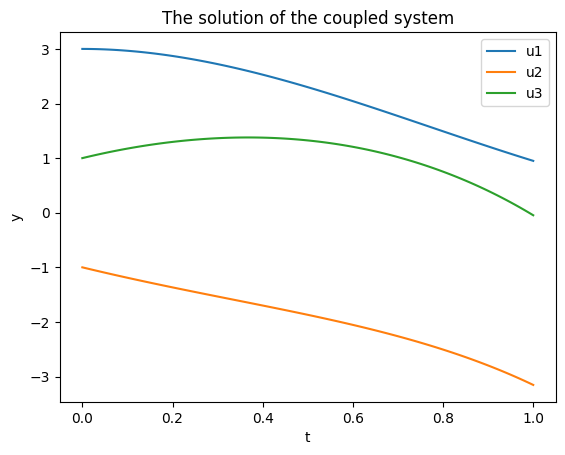

In [ ]:
from scipy.integrate import solve_ivp

def f(t, u):
    u1p = u[0] + (2*u[1]) - (2*u[2]) + e**(t)
    u2p = u[1] + u[2] - (2*(e**(-t)))
    u3p = u[0] + (2*u[1]) + e**(-t)
    return np.array([u1p,u2p,u3p])

N = 100
sol = solve_ivp(f, [0, 1], [3,-1,1], t_eval=np.linspace(0,1,N+1))

plt.figure(0)
plt.title(r"The solution of the coupled system")
plt.xlabel('t')
plt.ylabel('y')
plt.plot(sol.t,sol.y[0],label='u1')
plt.plot(sol.t,sol.y[1],label='u2')
plt.plot(sol.t,sol.y[2],label='u3')
plt.legend()
plt.show()

# Problem 14

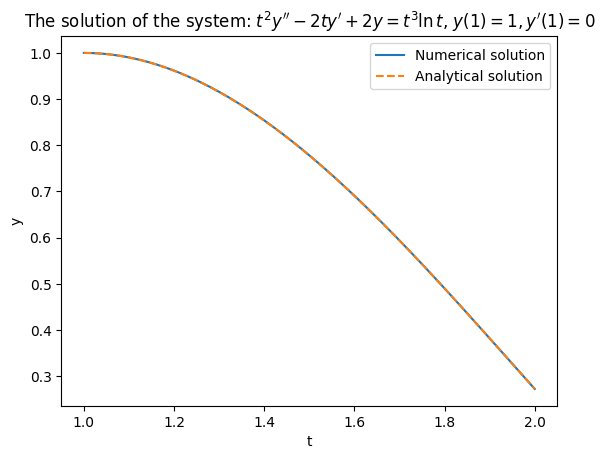

In [ ]:
# Define the parameters
dt = 0.001  # Time step
t_initial = 1.0
t_final = 2.0  # Final time
N = int((t_final - t_initial) / dt)  # Number of time steps
y0 = np.array([1.0, 0.0])  # Initial condition

T = np.linspace(t_initial,t_final,N+1)
Y = np.zeros([N+1,2])
Yt = np.zeros(N+1)
Y[0] = y0
Yt[0] = y0[0]

# Euler method loop
for i in range(N):
    y = Y[i]
    t = T[i]
    dy_dt = np.array([y[1],(((t**3)*log(t)) - 2*y[0] + (2*t*y[1]))/(t**2)])  # Define the derivative
    Y[i+1] = y + np.multiply(dy_dt,dt)  # Euler integration step
    Yt[i+1] = 7*T[i+1]/4 + ((T[i+1])**3)*log(T[i+1])/2 - (3/4)*(T[i+1])**3

plt.figure(0)
plt.title(r"The solution of the system: $t^2y'' - 2ty' + 2y = t^3\ln{t}$, $y(1) = 1, y'(1) = 0$")
plt.xlabel('t')
plt.ylabel('y')
plt.plot(T,Y[:,0],label='Numerical solution')
plt.plot(T,Yt,'--',label='Analytical solution')
plt.legend()
plt.show()